# Курс "Название"

---
# Семинар 7. Основы работы в PyTorch. Реализация кодера-декодера на базе НС в PyTorch

<html>
  <head>
    <meta charset='utf-8'>
  </head>
  <body>
    <ul>
      <li><strong>1. Основы работы в PyTorch</strong>
      <ul>
        <li>1.1 Базовые понятия</li>
      </ul>
      <ul>
        <li>1.2 Пишем первый нейрон</li>
      </ul>
    </ul>
    <ul>
      <li><strong>2. Реализация автоенкодера на PyTorch</strong>
      <ul>
        <li>2.1 Постановка задачи</li>
      </ul>
      <ul>
        <li>2.2 Подготовка базы данных</li>
      </ul>
    </ul>
    </ul>
  </body>
</html>

**[Документация PyTorch](https://pytorch.org/)**

**Подгрузим необходимые библиотеки в проект**

In [ ]:
import numpy as np
import random
from scipy.fftpack import fft, rfft, fftshift

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from PIL import Image
import scipy

import torch
import torch.nn as nn
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

import datetime, os

import seaborn as sns
sns.set_style('darkgrid')

# **1. Основны работы в PyTorch**

## 1.1 Базовые понятия

Тензоры 

torch.tensor или torch.FloatTensor - тензор с типом данных float32

torch.HalfTensor - тензор с типом данных float16

torch.DoubleTensor - тензор с типом данных float64

torch.ShortTensor - тензор с типом данных int16

torch.IntTensor - тензор с типом данных int32

torch.LongTensor - тензор с типом данных int64

torch.CharTensor - тензор с типом данных int8

torch.ByteTensor - тензор с типом данных uint8

torch.BoolTensor - тензор с типом данных bool

In [ ]:
# создание Тензора
x = torch.tensor(5.) # создаем скаляр
y = torch.FloatTensor([5.5]) # список типа float
z = torch.FloatTensor(5, 5) # список типа float из 5 списков по 5 значений
print(x)
print(y)
print(z)

tensor(5.)
tensor([5.5000])
tensor([[-4.0380e+25,  3.0834e-41,  7.0065e-44,  6.8664e-44,  6.3058e-44],
        [ 6.7262e-44,  7.8473e-44,  6.3058e-44,  7.1466e-44,  6.8664e-44],
        [ 1.1771e-43,  6.7262e-44,  7.8473e-44,  8.1275e-44,  7.1466e-44],
        [ 7.0065e-44,  8.1275e-44,  7.2868e-44,  7.4269e-44,  6.4460e-44],
        [ 7.9874e-44,  6.8664e-44,  7.2868e-44,  6.8664e-44,  7.8473e-44]])


In [ ]:
# индексирование
print(z[0])
# :: через два
print(z[::2])

tensor([-4.0380e+25,  3.0834e-41,  7.0065e-44,  6.8664e-44,  6.3058e-44])
tensor([[-4.0380e+25,  3.0834e-41,  7.0065e-44,  6.8664e-44,  6.3058e-44],
        [ 1.1771e-43,  6.7262e-44,  7.8473e-44,  8.1275e-44,  7.1466e-44],
        [ 7.9874e-44,  6.8664e-44,  7.2868e-44,  6.8664e-44,  7.8473e-44]])


In [ ]:
# информация о тензоре
print(z.dim()) # размерность тензора
print(z.size()) # размер или форма тензора (аналог .shape)
print(z.type()) # тип элементов
print(z.data_ptr()) # место в памяти, где хранится тензор

2
torch.Size([5, 5])
torch.FloatTensor
94510386617088


**Операции над тензорами**

In [ ]:
# виды функций

# неизменные функции (exp(), abs())
y = torch.IntTensor([-1, -5, -10]) # создаем тензор 
x = y.abs() # вызываем метод получения модуля (неизменяем исходный тензор)
print(y)
print(x)

tensor([ -1,  -5, -10], dtype=torch.int32)
tensor([ 1,  5, 10], dtype=torch.int32)


In [ ]:
# виды функций

# изменяемые функции
y = torch.IntTensor([-1, -5, -10]) # создаем тензор
x = y.abs_() # вызываем метод получения модуля (изменяем исходный тензор)
print(y)
print(x)

tensor([ 1,  5, 10], dtype=torch.int32)
tensor([ 1,  5, 10], dtype=torch.int32)


In [ ]:
# место в памяти
print(x.data_ptr(), y.data_ptr())

94510389015680 94510389015680


In [ ]:
x = torch.FloatTensor(3, 2) # создаем тензор размерностью 3 на 2
x.zero_() # заполняем его нулями
print(x) # выводим x

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [ ]:
# заполняем нулями в одну строчку
y = torch.FloatTensor(2, 3).zero_() # создаем тензор размерностью 3 на 2 и заполняем нулями
print(y) # выводим y

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
x = torch.tensor(4.) # создаем тензор
y = torch.tensor(5.) # создаем тензор
z1 = x.add(y) # складываем x и y и записываем результат в z1
z2 = torch.add(x, y) # складываем x и y и записываем результат в z2
x.add_(y) # складываем x и y И записываем результат в x
print(z1, z2, x) # выводим z1, z2, x

tensor(9.) tensor(9.) tensor(9.)


In [ ]:
x = torch.tensor(4.) # создаем тензор
y = torch.tensor(5.) # создаем тензор
x += y
print(x)

tensor(9.)


**Связь Torch с Numpy**

In [ ]:
a = np.random.rand(3, 2) # создаем numpy массив размерностью 3 на 2 из случайных чисел
a

array([[0.79969077, 0.54592185],
       [0.77119731, 0.91195671],
       [0.22297835, 0.09361475]])

In [ ]:
# Numpy -> Torch
b = torch.from_numpy(a) # переводим numpy в torch
b # уже тензор

tensor([[0.7997, 0.5459],
        [0.7712, 0.9120],
        [0.2230, 0.0936]], dtype=torch.float64)

In [ ]:
# Torch -> Numpy
c = b.numpy() # переводим torch в numpy
c # выводим уже numpy

array([[0.79969077, 0.54592185],
       [0.77119731, 0.91195671],
       [0.22297835, 0.09361475]])

[CUDA](https://habr.com/ru/post/54707/)

[CPU](https://habr.com/ru/post/240929/) и [GPU](https://habr.com/ru/company/dbtc/blog/498374/)

Тензоры можно переносить на видеокарты для повышения скорости выполнения

In [ ]:
x.is_cuda # проверяем где размещен тензор

False

In [ ]:
!nvidia-smi # утилита для вывода информации о GPU

Tue Aug 31 08:32:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
if not x.is_cuda: # если не на GPU
  x = x.cuda() # размещаем на GPU (создаем копию)
print(x.is_cuda) # проверяем: размещен ли тензор на GPU

True


In [ ]:
!nvidia-smi

Tue Aug 31 08:32:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    29W /  70W |   1068MiB / 15109MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.is_available() # проверяем доступна ли в текущем сеансе GPU

True

In [ ]:
# создадим переменную, в которой будет храниться тип устройства (GPU или CPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
x.to(device) #отправляем тензор на устройство и проверяем
x.is_cuda

True

**AD (automatic differentiation)**

In [ ]:
# создаем тензоры
x = torch.tensor(5.)
# requires_grad=True означает, что для тензора будет сохранена история операций над ним
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

In [ ]:
# строим вычислительный граф
y = w.mul(x).add(b) # y = w * 5 + b
y

tensor(23., grad_fn=<AddBackward0>)

In [ ]:
y.grad_fn

In [ ]:
# вычисляем градиенты (выполняем обратный проход и получаем производную всех переменных)
y.backward()

In [ ]:
# посмотрим градиенты для каждого из задействованных тензоров
print(x.grad) # по x - нет производной
print(w.grad) # (w * 5)' = 5
print(b.grad) # b' = 1 - const

None
tensor(5.)
tensor(1.)


## 1.2 Пишем первый нейрон

In [ ]:
# создаем тензоры
x = torch.randn(1) # входные данные для будущей модели (матрица случайных значений, соответствующих нормальному распределению)
y = torch.randn(1) # тензор с правильными ответами (матрица случайных значений, соответствующих нормальному распределению)
print(x)
print(y)

tensor([1.1819])
tensor([0.7800])


In [ ]:
# создаем 1 линейный слой (по сути, это является нашей нейронной сетью из одного слоя)
# y = w * x + b
linear = nn.Linear(in_features = 1, out_features = 1, bias = False)
# Linear это аналог Dense в Keras
print('веса: ', linear.weight)

веса:  Parameter containing:
tensor([[-0.5041]], requires_grad=True)


In [ ]:
list(linear.parameters())

[Parameter containing:
 tensor([[-0.5041]], requires_grad=True)]

In [ ]:
# применяем слой для x (прогоняем через нашу сетку)
pred = linear(x)
print(pred)

tensor([-0.5957], grad_fn=<SqueezeBackward3>)


In [ ]:
# функция ошибки (средне-квадратичное отклонение)
criterion = nn.MSELoss()
# mse = (y_true - y_pred) ** 2 / n

# оптимизатор, первый агрумент которого это параметры нейронной сети (в нашем случае линейный слой)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)
print(optimizer.param_groups)

[{'params': [Parameter containing:
tensor([[-0.5041]], requires_grad=True)], 'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}]


In [ ]:
loss = criterion(pred, y)
print(loss)
print('Ошибка: ', loss.item())

tensor(1.8927, grad_fn=<MseLossBackward>)
Ошибка:  1.8926609754562378


In [ ]:
# обратное распространение 
loss.backward()

# посмотрим на наши градиенты
print ('dL/dw: ', linear.weight.grad)

dL/dw:  tensor([[-3.2519]])


In [ ]:
-2 * x * (y - linear.weight * x)

tensor([[-3.2519]], grad_fn=<MulBackward0>)

In [ ]:
# делаем шаг градиентного спуска w = w - lr*grad
optimizer.step()
print(optimizer.param_groups)

# оптимизацию можно осуществлять также и на более низком уровне:
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# ошибка после оптимизации
pred = linear(x) 
loss = criterion(pred, y)
print('ошибка после шага оптимизации: ', loss.item())

[{'params': [Parameter containing:
tensor([[-0.4715]], requires_grad=True)], 'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}]
ошибка после шага оптимизации:  1.7883918285369873


In [ ]:
print(linear.weight.grad)     # вывод текущего градиента
for i in range(10):
    pred = linear(x)          # предсказание модели
    loss = criterion(pred, y) # вычисляем ошибку
    loss.backward()           # обратное распространение ошибки
    print(linear.weight.grad) # вывод обновленного градиента
    optimizer.step()          # шаг оптимизации

tensor([[-3.2519]])
tensor([[-6.4129]])
tensor([[-9.3948]])
tensor([[-12.1142]])
tensor([[-14.4952]])
tensor([[-16.4712]])
tensor([[-17.9872]])
tensor([[-19.0006]])
tensor([[-19.4833]])
tensor([[-19.4216]])
tensor([[-18.8174]])


In [ ]:
optimizer.zero_grad() # обнуляем градиент

In [ ]:
linear.weight.grad # вывод текущего градиента

tensor([[0.]])

In [ ]:
# обычно прогонка сети составляет больше одной эпохи.
# прогоним ее 100 эпох
for i in range(100): 
    # обнуляем вручную градиент на каждой итерации
    optimizer.zero_grad()

    # прогоняем переменную через сеть
    pred = linear(x) 

    # считаем функцию ошибки
    loss = criterion(pred,y)

    # обратное распространение ошибки
    loss.backward()

    # делаем шаг градиентного спуска
    optimizer.step()
    if i%10 ==0:
        print(loss.detach()) # .detach() отделяет тензор от вычислительного графа. Используется всегда при выводе 

tensor(0.2285)
tensor(0.1296)
tensor(0.0736)
tensor(0.0417)
tensor(0.0237)
tensor(0.0134)
tensor(0.0076)
tensor(0.0043)
tensor(0.0025)
tensor(0.0014)


In [ ]:
linear.weight # веса

Parameter containing:
tensor([[0.6838]], requires_grad=True)

In [ ]:
pred = linear(x) # финальное предсказание
print('Предсказание: ', pred.item())
print('Правильный ответ: ', y.item())

Предсказание:  0.8081344962120056
Правильный ответ:  0.7800201177597046


# **2. Реализация автоенкодера на PyTorch**

## 2.1 Постановка задачи

Детектирование аномалий - интересная задача машинного обучения. 

Существует множество способов ее решения и каждый набор данных имеет свои особенности. 

Одно из решений данной задачи - автоенкодеры.

Задача состоит в следующем - поиск аномалий в выборке нормальных законов распределения.

## 2.2 Подготовка датасета

Согласно **центральной предельной теореме**, сумма большого числа слабо зависимых случайных величин имеет распределение близкое к **нормальному**. При этом, случайные величины распределены в рамках определенного масштаба, то есть ни одно из значений не вносит существенного вклада в конечную сумму.

Нормальное распределение (распределение Гаусса) - распределение вероятностей, которое задаётся функцией:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{- \frac{(x-\mu)^2}{2\sigma^2}}$

где $\mu$ - математическое ожидание (среднее значение случайного процесса), а $\sigma$ - среднеквадратическое отклонение.

Нормальное распределение считается **стандартным**, если $\mu = 0, \sigma = 1$.

**Правило "трех сигм" $3\sigma$**

Правило трех сигм гласит, что с вероятностью $P = 0.997$ значения нормально распределенной последовательности лежат в интервале утроенного значения среднеквадратического отклонения. Иными словами, практически все значения случайного процесса лежат в интервале трех сигм, то есть в диапазоне $(x-3\sigma, x+3\sigma)$. 


In [ ]:
# функция для генерации нормального закона распределения с заданными параметрами
def gen_normal_distribution(mu, sigma, size, range=(0, 1), max_val=1):
  """
  Генерирование нормального закона распределения

  Параметры закона распределения:
  ---------
  mu: float
    мат. ожидание
  simga: float
    СКО
  size: int
    количество точек для закона распределения
  """

  bins = np.linspace(*range, size)
  result = 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-(bins - mu)**2 / (2*sigma**2))

  cur_max_val = result.max()
  k = max_val / cur_max_val

  result *= k

  return result

In [ ]:
# создадим нормальное распределение с мат.ожидание равным 0.3, и СКО равным 0.1
dist = gen_normal_distribution(0.3, 0.1, 256, max_val=1)

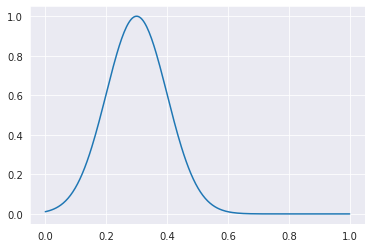

In [ ]:
# визуализация нормального закона распределения
plt.plot(np.linspace(0, 1, 256), dist)
plt.show()

**Функции для генерирования примеров**

In [ ]:
# функция для генерирования нормальных примеров - один максимум распределения
def generate_normal_samples(size, sample_size):

  normal_samples = np.zeros((size, sample_size))
  normal_mus = np.random.uniform(0.1, 0.9, size) 
  normal_sigmas = np.random.uniform(0.05, 0.25, size) 
  for i in range(size):
    normal_samples[i] = gen_normal_distribution(normal_mus[i], normal_sigmas[i], sample_size, max_val=1)
  
  return normal_samples

In [ ]:
# функция для генерирования аномальных примеров - два максимума распределения
def generate_anomal_samples(size, sample_size):

  anomal_samples = generate_normal_samples(size, sample_size)
  anomal_additional_mus = np.random.uniform(0.1, 0.9, size) 
  anomal_additional_sigmas = np.random.uniform(0.01, 0.05, size)
  for i in range(size):
    anomaly = gen_normal_distribution(anomal_additional_mus[i], anomal_additional_sigmas[i], sample_size, max_val=0.12)
    anomal_samples[i] += anomaly
  
  return anomal_samples

**Параметры датасета, размеры датасета**

In [ ]:
# размер обучающей выборки
train_size = 10000
# размер проверочной выборки
val_size = 300
# размер тестовой выборки
test_size = 100
# число точек
sample_size = 256

In [ ]:
train_normal = generate_normal_samples(train_size, sample_size)
val_normal = generate_normal_samples(val_size, sample_size)
val_anomal = generate_anomal_samples(val_size, sample_size)
test_normal = generate_normal_samples(test_size, sample_size)
test_anomal = generate_anomal_samples(test_size, sample_size)

**Объединим тестовую выборку и установим метки**

In [ ]:
# нормальное распределение - 0
# аномальное распределение - 1

x_val = np.concatenate((val_normal, val_anomal))
y_val = np.concatenate((np.zeros(val_size), np.ones(val_size)))

x_test = np.concatenate((test_normal, test_anomal))
y_test = np.concatenate((np.zeros(test_size), np.ones(test_size)))

**Нормальное распределение**

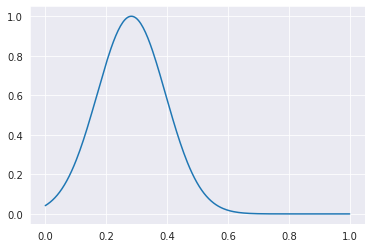

In [ ]:
plt.plot(np.linspace(0, 1, sample_size), val_normal[np.random.randint(0, val_size)])
plt.show()

**Аномальное распределение**

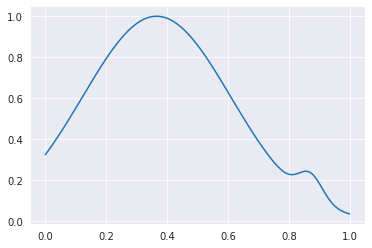

In [ ]:
plt.plot(np.linspace(0, 1, sample_size), val_anomal[np.random.randint(0, val_size)])
plt.show()

## 2.3 Autoencoder

Автокодировщик (англ. autoencoder) - специальная архитектура искусственных нейронных сетей, позволяющая применять обучения без учителя при использовании метода обратного распространения ошибки.

Цель обучения автокодировщиков: найти внутреннюю структуру в данных.

Одно из применений - поиск выбросов.

Простейшая архитектура автокодировщика - сеть прямого распространения без обратных связей, наиболее схожая с персептроном и содержащая входной слой, промежуточный слой и выходной слой. В отличие от персептрона выходной слой автокодировщика должен содержать столько же нейронов, сколько и выходной слой.




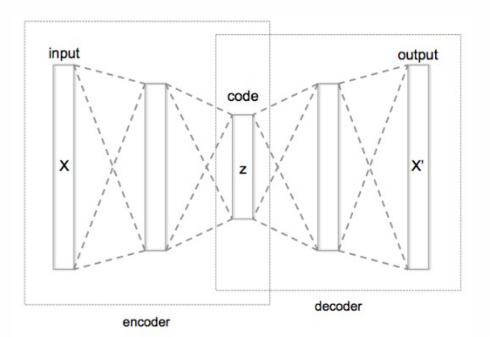

Автокодировщик состоит из двух частей: **энкодера** **Х**(кодирует выборку Х в свое внутреннее представление Z) и **декодера** **X'** (восстанавливает исходную выборку)

Автокодировщик пытается совместить восстановленную версию каждого объекта выборки с исходным объектом.

Как работает автокодировщик для поиска выбросов. Автокодировщик обучается на нормальных ситуациях и если на него будут поступать аномальные данные, сеть не сможет грамотно восстановить данные - появится выброс.

## 2.4 Модель на PyTorch

**Зададим гиперпараметры модели**

In [ ]:
input_size = 256 # число точек
epochs = 200 # число эпох
learning_rate = 1e-3 # скорость обучения
batch_size = 32 # размер батча

**Создание датасета**

In [ ]:
# берем для обучающего набора только нормальные распределения
train_distribution = train_normal
train_distribution = torch.tensor(train_distribution.astype(np.float32))

train_dataset = torch.utils.data.TensorDataset(train_distribution)
train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [ ]:
# для проверочного набора возьмем и нормальные и аномальные распределения
val_distribution = x_val

val_dataset = torch.utils.data.TensorDataset(
    torch.tensor(x_val.astype(np.float32)),
    torch.tensor(y_val.astype(np.long))
)

val_loader = torch.utils.data.DataLoader(val_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
# для тестового набора возьмем и нормальные и аномальные распределения
test_distribution = x_test

test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(x_test.astype(np.float32)),
    torch.tensor(y_test.astype(np.long))
)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

**Архитектура модели**

In [ ]:
# создаем класс
class Autoencoder(nn.Module):
  def __init__(self, input_size):
    super().__init__() # наследуем все свойства + добавляем свое
    # создаем энкодер
    self.encoder = nn.Sequential(
        nn.Linear(input_size, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 16),
        nn.ReLU(),
        nn.Linear(16, 4),
        nn.ReLU(),
    )
    # создаем декодер
    self.decoder = nn.Sequential(
        nn.Linear(4, 16),
        nn.ReLU(),
        nn.Linear(16, 32),
        nn.ReLU(),
        nn.Linear(32, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, input_size),
        nn.ReLU(),
    )
  
  def forward(self, x):
     out = self.encoder(x)
     out = self.decoder(out)
     return out

**Формируем модель**

In [ ]:
model = Autoencoder(input_size).to(device)

In [ ]:
summary(model, (input_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]          32,896
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 16]           1,040
              ReLU-6                   [-1, 16]               0
            Linear-7                    [-1, 4]              68
              ReLU-8                    [-1, 4]               0
            Linear-9                   [-1, 16]              80
             ReLU-10                   [-1, 16]               0
           Linear-11                   [-1, 32]             544
             ReLU-12                   [-1, 32]               0
           Linear-13                   [-1, 64]           2,112
             ReLU-14                   

**Функция ошибки и оптимизатор**

In [ ]:
criterion = nn.MSELoss() # функция ошибки
per_sample_criterion = nn.MSELoss(reduction='none') # loss для каждого примера, пропущенного через модель
# без параметра reduction='none' pytorch усредняет loss'ы по всем объектам
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

In [ ]:
def save_score_distribution(model, data_loader, criterion, figsize=(8, 6)):

  # создаем список для ошибки на выходе сети
  losses = []
  # создаем список для метки
  labels = []

  # достаем все примеры из выборки
  for (x_batch, y_batch) in data_loader:
    # отправляем x_batch на видеокарту
    x_batch = x_batch.to(device)
    
    # пропускаем через модель x_batch
    output = model(x_batch)
    loss = criterion(output, x_batch)
    
    loss = torch.mean(loss, dim=1)
    loss = loss.detach().cpu().numpy().flatten()

    # добавляем значение среднее значени ошибки в список
    losses.append(loss)
    # добавляем метку в список
    labels.append(y_batch.detach().cpu().numpy().flatten())
  
  # объединяем списки в один  numpy массив
  losses = np.concatenate(losses)
  labels = np.concatenate(labels)
  
  # ошибка на нормальных данных
  losses_0 = losses[labels == 0]
  # ошибка на аномальных данных
  losses_1 = losses[labels == 1]

  fig, ax = plt.subplots(1, figsize=figsize)

  ax.boxplot([losses_0, losses_1])
  ax.set_xticklabels(['normal', 'anomaly'])

  plt.show()

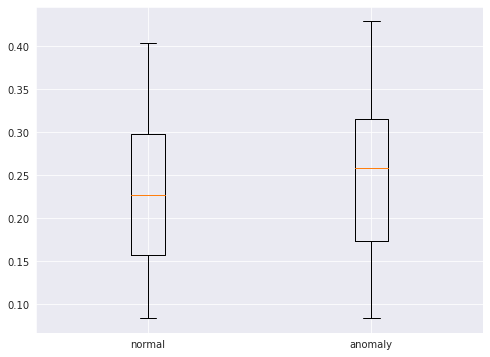

In [ ]:
save_score_distribution(model, val_loader, per_sample_criterion)

Думаю, стоит обсудить немного подробнее, как же понимать box plot. 

Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. 

Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения.

С коробкой разобрались, перейдем к усам. Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 — интерквартильный размах. Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.



**Обучаем модель**

epoch [1/200], train loss:29.3947


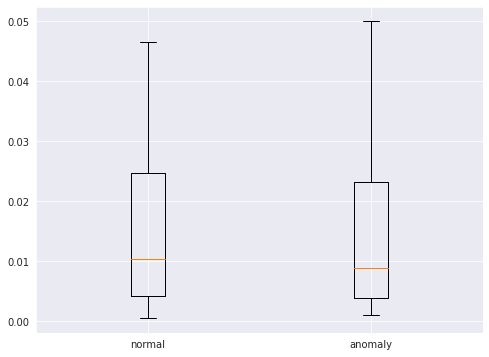

epoch [2/200], train loss:3.2024
epoch [3/200], train loss:1.2041
epoch [4/200], train loss:0.7020
epoch [5/200], train loss:0.5062
epoch [6/200], train loss:0.3452
epoch [7/200], train loss:0.2986
epoch [8/200], train loss:0.2531
epoch [9/200], train loss:0.2423
epoch [10/200], train loss:0.2479
epoch [11/200], train loss:0.1915
epoch [12/200], train loss:0.2126
epoch [13/200], train loss:0.1701
epoch [14/200], train loss:0.1601
epoch [15/200], train loss:0.1650
epoch [16/200], train loss:0.1549
epoch [17/200], train loss:0.1493
epoch [18/200], train loss:0.1271
epoch [19/200], train loss:0.1370
epoch [20/200], train loss:0.1266
epoch [21/200], train loss:0.1559


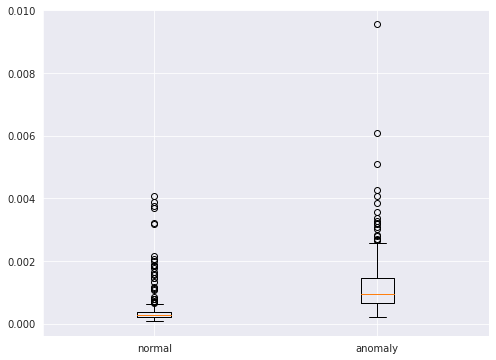

epoch [22/200], train loss:0.1166
epoch [23/200], train loss:0.1180
epoch [24/200], train loss:0.1345
epoch [25/200], train loss:0.1090
epoch [26/200], train loss:0.1146
epoch [27/200], train loss:0.1044
epoch [28/200], train loss:0.1176
epoch [29/200], train loss:0.1182
epoch [30/200], train loss:0.1014
epoch [31/200], train loss:0.1001
epoch [32/200], train loss:0.1180
epoch [33/200], train loss:0.0960
epoch [34/200], train loss:0.0883
epoch [35/200], train loss:0.1025
epoch [36/200], train loss:0.0963
epoch [37/200], train loss:0.0889
epoch [38/200], train loss:0.0904
epoch [39/200], train loss:0.1025
epoch [40/200], train loss:0.0959
epoch [41/200], train loss:0.0870


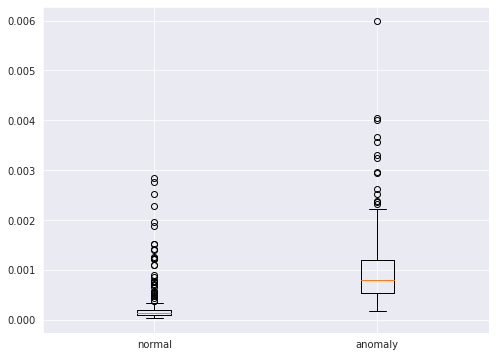

epoch [42/200], train loss:0.0873
epoch [43/200], train loss:0.0858
epoch [44/200], train loss:0.0959
epoch [45/200], train loss:0.0827
epoch [46/200], train loss:0.0816
epoch [47/200], train loss:0.0940
epoch [48/200], train loss:0.0922
epoch [49/200], train loss:0.0825
epoch [50/200], train loss:0.0869
epoch [51/200], train loss:0.0783
epoch [52/200], train loss:0.0839
epoch [53/200], train loss:0.0926
epoch [54/200], train loss:0.0661
epoch [55/200], train loss:0.0879
epoch [56/200], train loss:0.0729
epoch [57/200], train loss:0.0895
epoch [58/200], train loss:0.0746
epoch [59/200], train loss:0.0672
epoch [60/200], train loss:0.0805
epoch [61/200], train loss:0.0674


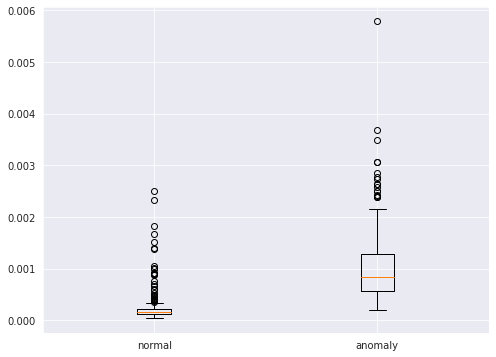

epoch [62/200], train loss:0.0729
epoch [63/200], train loss:0.0688
epoch [64/200], train loss:0.0788
epoch [65/200], train loss:0.0818
epoch [66/200], train loss:0.0681
epoch [67/200], train loss:0.0718
epoch [68/200], train loss:0.0793
epoch [69/200], train loss:0.0756
epoch [70/200], train loss:0.0743
epoch [71/200], train loss:0.0697
epoch [72/200], train loss:0.0660
epoch [73/200], train loss:0.0676
epoch [74/200], train loss:0.0617
epoch [75/200], train loss:0.0908
epoch [76/200], train loss:0.0682
epoch [77/200], train loss:0.0594
epoch [78/200], train loss:0.0770
epoch [79/200], train loss:0.0582
epoch [80/200], train loss:0.0798
epoch [81/200], train loss:0.0647


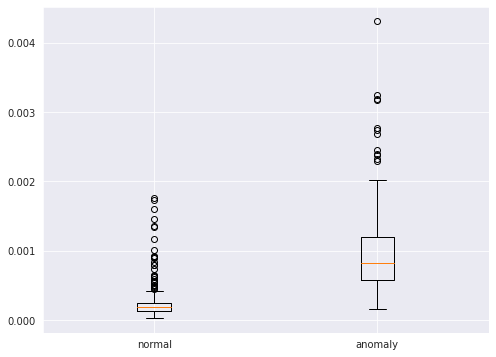

epoch [82/200], train loss:0.0576
epoch [83/200], train loss:0.0609
epoch [84/200], train loss:0.0674
epoch [85/200], train loss:0.0631
epoch [86/200], train loss:0.0732
epoch [87/200], train loss:0.0681
epoch [88/200], train loss:0.0571
epoch [89/200], train loss:0.0638
epoch [90/200], train loss:0.0776
epoch [91/200], train loss:0.0578
epoch [92/200], train loss:0.0737
epoch [93/200], train loss:0.0503
epoch [94/200], train loss:0.0726
epoch [95/200], train loss:0.0595
epoch [96/200], train loss:0.0627
epoch [97/200], train loss:0.0640
epoch [98/200], train loss:0.0540
epoch [99/200], train loss:0.0550
epoch [100/200], train loss:0.0630
epoch [101/200], train loss:0.0621


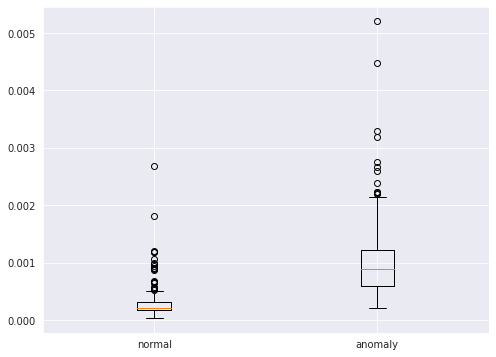

epoch [102/200], train loss:0.0586
epoch [103/200], train loss:0.0649
epoch [104/200], train loss:0.0579
epoch [105/200], train loss:0.0639
epoch [106/200], train loss:0.0667
epoch [107/200], train loss:0.0528
epoch [108/200], train loss:0.0563
epoch [109/200], train loss:0.0523
epoch [110/200], train loss:0.0683
epoch [111/200], train loss:0.0561
epoch [112/200], train loss:0.0571
epoch [113/200], train loss:0.0558
epoch [114/200], train loss:0.0569
epoch [115/200], train loss:0.0607
epoch [116/200], train loss:0.0563
epoch [117/200], train loss:0.0608
epoch [118/200], train loss:0.0488
epoch [119/200], train loss:0.0622
epoch [120/200], train loss:0.0563
epoch [121/200], train loss:0.0542


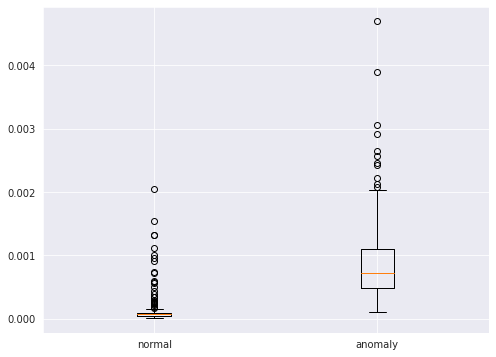

epoch [122/200], train loss:0.0557
epoch [123/200], train loss:0.0613
epoch [124/200], train loss:0.0613
epoch [125/200], train loss:0.0583
epoch [126/200], train loss:0.0474
epoch [127/200], train loss:0.0599
epoch [128/200], train loss:0.0660
epoch [129/200], train loss:0.0511
epoch [130/200], train loss:0.0507
epoch [131/200], train loss:0.0547
epoch [132/200], train loss:0.0691
epoch [133/200], train loss:0.0505
epoch [134/200], train loss:0.0518
epoch [135/200], train loss:0.0661
epoch [136/200], train loss:0.0450
epoch [137/200], train loss:0.0565
epoch [138/200], train loss:0.0504
epoch [139/200], train loss:0.0624
epoch [140/200], train loss:0.0578
epoch [141/200], train loss:0.0439


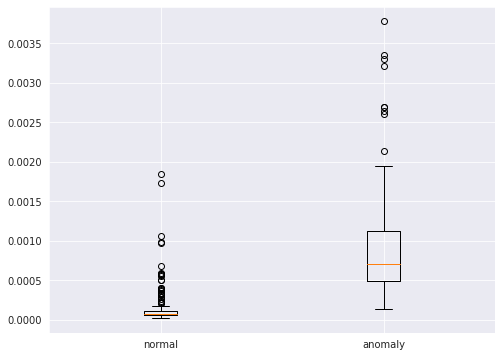

epoch [142/200], train loss:0.0545
epoch [143/200], train loss:0.0585
epoch [144/200], train loss:0.0556
epoch [145/200], train loss:0.0486
epoch [146/200], train loss:0.0604
epoch [147/200], train loss:0.0504
epoch [148/200], train loss:0.0511
epoch [149/200], train loss:0.0541
epoch [150/200], train loss:0.0513
epoch [151/200], train loss:0.0548
epoch [152/200], train loss:0.0471
epoch [153/200], train loss:0.0622
epoch [154/200], train loss:0.0533
epoch [155/200], train loss:0.0528
epoch [156/200], train loss:0.0465
epoch [157/200], train loss:0.0661
epoch [158/200], train loss:0.0567
epoch [159/200], train loss:0.0561
epoch [160/200], train loss:0.0468
epoch [161/200], train loss:0.0466


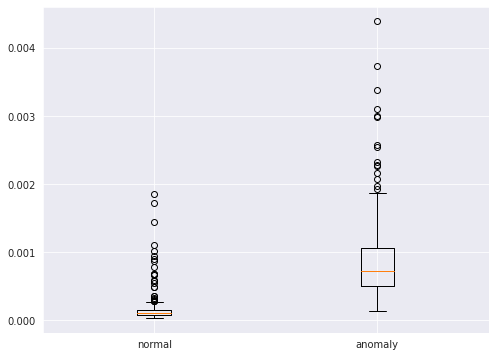

epoch [162/200], train loss:0.0522
epoch [163/200], train loss:0.0466
epoch [164/200], train loss:0.0487
epoch [165/200], train loss:0.0523
epoch [166/200], train loss:0.0439
epoch [167/200], train loss:0.0557
epoch [168/200], train loss:0.0491
epoch [169/200], train loss:0.0593
epoch [170/200], train loss:0.0468
epoch [171/200], train loss:0.0517
epoch [172/200], train loss:0.0465
epoch [173/200], train loss:0.0575
epoch [174/200], train loss:0.0488
epoch [175/200], train loss:0.0495
epoch [176/200], train loss:0.0512
epoch [177/200], train loss:0.0457
epoch [178/200], train loss:0.0492
epoch [179/200], train loss:0.0574
epoch [180/200], train loss:0.0502
epoch [181/200], train loss:0.0493


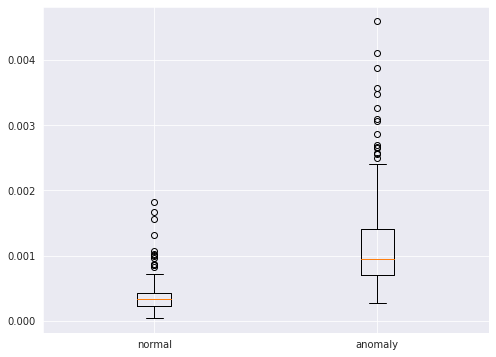

epoch [182/200], train loss:0.0453
epoch [183/200], train loss:0.0628
epoch [184/200], train loss:0.0514
epoch [185/200], train loss:0.0503
epoch [186/200], train loss:0.0495
epoch [187/200], train loss:0.0531
epoch [188/200], train loss:0.0454
epoch [189/200], train loss:0.0409
epoch [190/200], train loss:0.0522
epoch [191/200], train loss:0.0481
epoch [192/200], train loss:0.0548
epoch [193/200], train loss:0.0466
epoch [194/200], train loss:0.0584
epoch [195/200], train loss:0.0459
epoch [196/200], train loss:0.0425
epoch [197/200], train loss:0.0510
epoch [198/200], train loss:0.0402
epoch [199/200], train loss:0.0443
epoch [200/200], train loss:0.0472


In [ ]:
for epoch in range(epochs):
  running_loss = 0

  for (x_batch, ) in train_loader: # обучаем модель на тренировочных данных, только на реализации
    x_batch = x_batch.to(device) # отправляем реализации на используемое устройство
    
    output = model(x_batch) # здесь наше предсказание
    loss = criterion(output, x_batch) # считаем ошибку

    optimizer.zero_grad() # обнуляем градиент
    loss.backward() # обратное распределение ошибки 
                    # x.grad += dloss/dx
    optimizer.step() # следующий шаг спуска
    running_loss += loss.item() # инкремент ошибки
  
  # выводим ошибку на обучающем наборе
  print("epoch [{}/{}], train loss:{:.4f}".format(epoch+1, epochs, running_loss))
  
  if epoch%20 == 0:
    # строим boxplot ошибок на проверочных данных
    save_score_distribution(model, val_loader, per_sample_criterion)

**Ошибки на аномальных и нормальных классах отличаются достаточно сильно.**

**Сравним, как выглядят реальные и восстановленные данные.**

In [ ]:
# функция возвращает восстановленные объекты
def get_prediction(model, x):

  dataset = torch.utils.data.TensorDataset(torch.tensor(x.astype(np.float32)))
  data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)
  
  predictions = []
  for batch in data_loader:
    x_batch = batch[0].to(device)
    pred = model(x_batch)
    predictions.append(pred.detach().cpu().numpy())
  
  predictions = np.concatenate(predictions)
  return predictions

# визуализация объектов из нескольких выборок (исходной и восстановленной)
def compare_data(xs, sample_num, data_range=(0, 1), labels=None):
  fig, axes = plt.subplots(len(xs))
  sample_size = len(xs[0][sample_num])
  
  for i in range(len(xs)):
    axes[i].plot(np.linspace(*data_range, sample_size), xs[i][sample_num])
  
  if labels:
    for i, label in enumerate(labels):
      axes[i].set_ylabel(label)

**Предиктим на тестовой выборке**

In [ ]:
x_test_pred = get_prediction(model, x_test)

Нормальное распределение


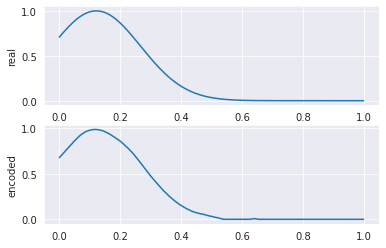

In [ ]:
print('Нормальное распределение')
compare_data([x_test[y_test == 0], x_test_pred[y_test == 0]], 8, labels=["real", "encoded"])

Аномальное распределение


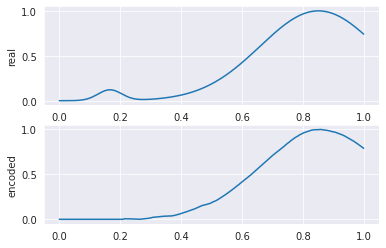

In [ ]:
print('Аномальное распределение')
compare_data([x_test[y_test == 1], x_test_pred[y_test == 1]], 8, labels=["real", "encoded"])

**Оценка сети**

In [ ]:
# определяем среднеквадратическую ошибку по test_x и предсказанным test_x
mse = np.mean(np.power(x_test - x_test_pred, 2), axis=1)

In [ ]:
mse_normal = mse[y_test == 0] # среднеквадратичная ошибка на нормальных операциях
mse_anomal = mse[y_test == 1] # среднеквадратичная ошибка на аномальных операциях

In [ ]:
print("Минимальная ошибка на нормальных данных:", round(min(mse_normal),6)) #найдем минимальную среднеквадратичную ошибку на нормальных данных
print("Максимальная ошибка нормальных данных:", round(max(mse_normal),6)) #найдем максимальную среднеквадратичную ошибку на нормальных данных
print("Средняя ошибка нормальных данных:", round(sum(mse_normal) / len(mse_normal),6)) # среднюю ошибку

Минимальная ошибка на нормальных данных: 3.1e-05
Максимальная ошибка нормальных данных: 0.002134
Средняя ошибка нормальных данных: 0.00022


In [ ]:
print("Минимальная ошибка аномальных данных:", round(min(mse_anomal),6)) #найдем минимальную среднеквадратичную ошибку на аномальных данных
print("Максимальная ошибка аномальных данных:", round(max(mse_anomal),6)) #найдем максимальную среднеквадратичную ошибку на аномальных данных
print("Средняя ошибка аномальных данных:", round(sum(mse_anomal) / len(mse_anomal),6)) # среднюю ошибку

Минимальная ошибка аномальных данных: 0.000255
Максимальная ошибка аномальных данных: 0.003037
Средняя ошибка аномальных данных: 0.00098


In [ ]:
def getAccByBias(bias): # функция будет принимать какое то пороговое значение

  isNormal = mse_normal < bias # если ошибка меньше порога - то нормальное распределение
  isAnomal = mse_anomal > bias # если ошибка больше порога - то аномальное распределение

  accNormal = sum(isNormal) / len(isNormal) # вычисляем процент нормальных данных
  accAnomal = sum(isAnomal) / len(isAnomal) # вычисляем процент аномальных данных

  print("Распознано нормальных распределений: ", round(100*accNormal), "%", sep="")
  print("Распознано аномальных распределений: ", round(100*accAnomal), "%", sep="")
  print("Средняя точность распознавания: ", round(50*(accAnomal + accAnomal)), "%", sep="")

In [ ]:
getAccByBias(0.00037) # выведем данные по распознаванию с конкретным пороговым значением

Распознано нормальных распределений: 87%
Распознано аномальных распределений: 92%
Средняя точность распознавания: 92%
